In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('fods.csv')

In [3]:
data=df

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5501 entries, 0 to 5500
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   full_name       5501 non-null   object 
 1   class           5492 non-null   object 
 2   a               5501 non-null   float64
 3   e               5501 non-null   float64
 4   i               5501 non-null   float64
 5   q               5501 non-null   float64
 6   H               5480 non-null   float64
 7   neo             5501 non-null   object 
 8   pha             5481 non-null   object 
 9   diameter        4467 non-null   float64
 10  albedo          4399 non-null   float64
 11  diameter_sigma  4318 non-null   float64
 12  orbit_id        5501 non-null   object 
 13  n               5501 non-null   float64
 14  per             5501 non-null   int64  
 15  moid            5500 non-null   float64
dtypes: float64(10), int64(1), object(5)
memory usage: 687.8+ KB


In [5]:
df.isna().sum()

full_name            0
class                9
a                    0
e                    0
i                    0
q                    0
H                   21
neo                  0
pha                 20
diameter          1034
albedo            1102
diameter_sigma    1183
orbit_id             0
n                    0
per                  0
moid                 1
dtype: int64

In [6]:
df.describe()

,a,e,i,q,H,diameter,albedo,diameter_sigma,n,per,moid
count,5501.000000,5501.000000,5501.000000,5501.000000,5480.000000,4467.000000,4399.000000,4318.000000,5501.000000,5501.000000,5500.000000
mean,2.364862,0.291701,11.836657,1.720837,15.446255,10.740601,0.192610,0.300030,0.346839,1390.259226,0.836726
std,0.893474,0.217002,11.135721,0.868136,3.789255,12.756915,0.144754,0.558589,0.240807,1107.531183,0.750665
min,0.617500,0.002300,0.070000,0.081000,5.640000,0.002500,0.001000,0.000000,0.007395,177.000000,0.000073
25%,1.926000,0.121500,4.120000,0.973000,12.470000,1.881500,0.069000,0.080000,0.211500,977.000000,0.121000
50%,2.371000,0.198600,8.600000,1.861000,13.720000,7.116000,0.172000,0.160000,0.270000,1330.000000,0.867000
75%,2.790000,0.466700,15.530000,2.328000,18.580000,14.747500,0.277000,0.280000,0.368600,1700.000000,1.340000
max,26.090000,0.968500,162.490000,8.552000,29.900000,166.000000,1.000000,8.880000,2.031000,48700.000000,7.550000


In [7]:
data['H']=data['H'].fillna(data['H'].median())

In [8]:
default_albedo = 0.15

# Function to calculate diameter based on H and albedo
def calculate_diameter(row):
    H = row['H']
    albedo = row['albedo'] if not pd.isnull(row['albedo']) else default_albedo
    return 1329 / np.sqrt(albedo) * 10 ** (-0.2 * H)

In [9]:
# Create a new column 'diameter_imputed' with calculated or existing values
data['diameter_imputed'] = data.apply(
    lambda row: row['diameter'] if not pd.isnull(row['diameter']) else calculate_diameter(row),
      axis=1)

###### Filling null values of diameter using Mathemtical imputation considering H and albedo.

In [10]:
data.describe()

,a,e,i,q,H,diameter,albedo,diameter_sigma,n,per,moid,diameter_imputed
count,5501.000000,5501.000000,5501.000000,5501.000000,5501.000000,4467.000000,4399.000000,4318.000000,5501.000000,5501.000000,5500.000000,5501.00000
mean,2.364862,0.291701,11.836657,1.720837,15.439666,10.740601,0.192610,0.300030,0.346839,1390.259226,0.836726,8.85287
std,0.893474,0.217002,11.135721,0.868136,3.783512,12.756915,0.144754,0.558589,0.240807,1107.531183,0.750665,12.15046
min,0.617500,0.002300,0.070000,0.081000,5.640000,0.002500,0.001000,0.000000,0.007395,177.000000,0.000073,0.00250
25%,1.926000,0.121500,4.120000,0.973000,12.480000,1.881500,0.069000,0.080000,0.211500,977.000000,0.121000,0.72900
50%,2.371000,0.198600,8.600000,1.861000,13.720000,7.116000,0.172000,0.160000,0.270000,1330.000000,0.867000,5.12100
75%,2.790000,0.466700,15.530000,2.328000,18.570000,14.747500,0.277000,0.280000,0.368600,1700.000000,1.340000,12.38400
max,26.090000,0.968500,162.490000,8.552000,29.900000,166.000000,1.000000,8.880000,2.031000,48700.000000,7.550000,166.00000


In [11]:
data.isna().sum()

full_name              0
class                  9
a                      0
e                      0
i                      0
q                      0
H                      0
neo                    0
pha                   20
diameter            1034
albedo              1102
diameter_sigma      1183
orbit_id               0
n                      0
per                    0
moid                   1
diameter_imputed       0
dtype: int64

In [12]:
data=data.drop(columns=['diameter_sigma'])

In [13]:
def calculate_albedo(row):
    if row['diameter_imputed']<=5:
        return 0.25  # Small diameter, higher albedo
    elif row['diameter_imputed']<=20:
        return 0.15  # Medium diameter, moderate albedo
    else:
        return 0.1   # Large diameter, lower albedo

# Apply the function conditionally to fill NaN values in 'albedo'
data['albedo']=data['albedo'].fillna(data.apply(calculate_albedo, axis=1))

In [14]:
data['class']=data['class'].fillna(data['class'].mode())

In [15]:
data.describe()

,a,e,i,q,H,diameter,albedo,n,per,moid,diameter_imputed
count,5501.000000,5501.000000,5501.000000,5501.000000,5501.000000,4467.000000,5501.000000,5501.000000,5501.000000,5500.000000,5501.00000
mean,2.364862,0.291701,11.836657,1.720837,15.439666,10.740601,0.204007,0.346839,1390.259226,0.836726,8.85287
std,0.893474,0.217002,11.135721,0.868136,3.783512,12.756915,0.131473,0.240807,1107.531183,0.750665,12.15046
min,0.617500,0.002300,0.070000,0.081000,5.640000,0.002500,0.001000,0.007395,177.000000,0.000073,0.00250
25%,1.926000,0.121500,4.120000,0.973000,12.480000,1.881500,0.086000,0.211500,977.000000,0.121000,0.72900
50%,2.371000,0.198600,8.600000,1.861000,13.720000,7.116000,0.224000,0.270000,1330.000000,0.867000,5.12100
75%,2.790000,0.466700,15.530000,2.328000,18.570000,14.747500,0.250000,0.368600,1700.000000,1.340000,12.38400
max,26.090000,0.968500,162.490000,8.552000,29.900000,166.000000,1.000000,2.031000,48700.000000,7.550000,166.00000


In [16]:
def handle_outliers_iqr(df, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap outliers to the lower and upper bounds
    data[column] = data[column].apply(lambda x: lower_bound if x < lower_bound 
                                  else (upper_bound if x > upper_bound else x))
    return data

In [17]:
# List of columns to handle outliers for
columns = ['H', 'albedo', 'diameter', 'diameter_imputed', 'moid']

# Apply the outlier handling function to each specified column
for column in columns:
    data = handle_outliers_iqr(data, column)

###### Handling the outliers in dataset for important parameters.

In [18]:
%matplotlib inline

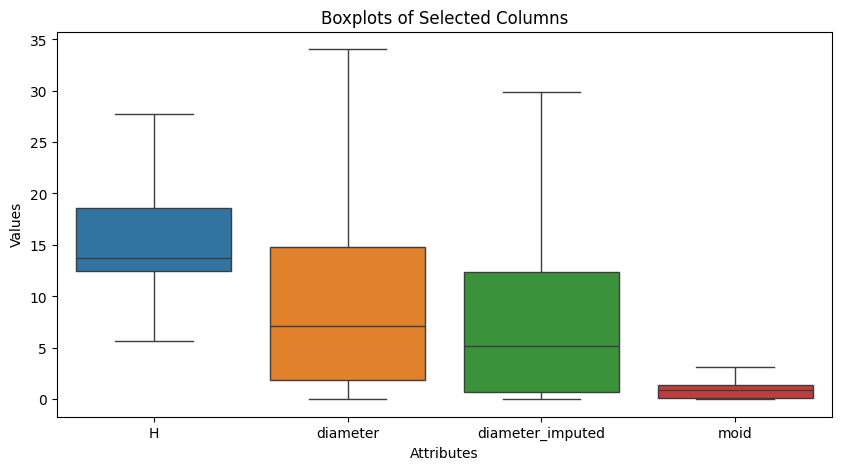

In [19]:
columns = ['H','diameter','diameter_imputed','moid']
plt.figure(figsize=(10,5))
sns.boxplot(data=data[columns])

# Set plot title and labels
plt.title('Boxplots of Selected Columns')
plt.xlabel('Attributes')
plt.ylabel('Values')
plt.show()

<Axes: ylabel='albedo'>

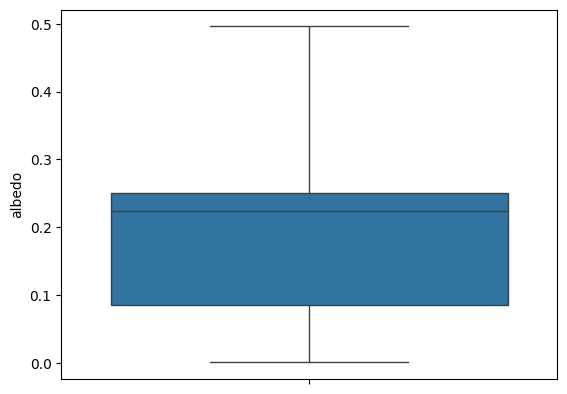

In [20]:
sns.boxplot(data['albedo'])

###### Confirmation of no outliers through boxplot and its descriptive analysis.

In [21]:
data=pd.get_dummies(data,columns=['pha','neo'], drop_first=True)

In [22]:
data.head()

,full_name,class,a,e,i,q,H,diameter,albedo,orbit_id,n,per,moid,diameter_imputed,pha_Y,neo_Y
0,(2012 XB112),APO,1.029,0.1446,1.32,0.880,27.705,0.0025,0.250,JPL 22,0.9445,381,0.000649,0.0025,False,True
1,(2010 FD6),APO,1.446,0.4352,0.46,0.817,26.800,0.0080,0.496,JPL 9,0.5666,635,0.002750,0.0080,False,True
2,(2010 GH7),APO,1.401,0.2999,3.52,0.981,27.350,0.0080,0.326,JPL 17,0.5945,606,0.002150,0.0080,False,True
3,(2016 TM56),APO,1.119,0.1308,2.35,0.973,26.900,0.0080,0.467,JPL 24,0.8325,432,0.009820,0.0080,False,True
4,(2010 KV7),APO,1.214,0.2185,0.31,0.949,26.000,0.0130,0.397,JPL 7,0.7368,489,0.001250,0.0130,False,True


In [23]:
data['pha_Y']=data['pha_Y'].replace({True:1,False:0})
data['neo_Y']=data['neo_Y'].replace({True:1,False:0})

In [24]:
data.head()

,full_name,class,a,e,i,q,H,diameter,albedo,orbit_id,n,per,moid,diameter_imputed,pha_Y,neo_Y
0,(2012 XB112),APO,1.029,0.1446,1.32,0.880,27.705,0.0025,0.250,JPL 22,0.9445,381,0.000649,0.0025,0,1
1,(2010 FD6),APO,1.446,0.4352,0.46,0.817,26.800,0.0080,0.496,JPL 9,0.5666,635,0.002750,0.0080,0,1
2,(2010 GH7),APO,1.401,0.2999,3.52,0.981,27.350,0.0080,0.326,JPL 17,0.5945,606,0.002150,0.0080,0,1
3,(2016 TM56),APO,1.119,0.1308,2.35,0.973,26.900,0.0080,0.467,JPL 24,0.8325,432,0.009820,0.0080,0,1
4,(2010 KV7),APO,1.214,0.2185,0.31,0.949,26.000,0.0130,0.397,JPL 7,0.7368,489,0.001250,0.0130,0,1


###### categorical PHA and NEO values to 0-no and 1-yes.

In [25]:
ogd=data

In [26]:
from sklearn.preprocessing import MinMaxScaler

# Select only the numerical columns
numerical_cols=data.select_dtypes(include=['float64','int64']).columns

# Apply Min-Max Scaling to all numerical columns
scaler=MinMaxScaler()
data[numerical_cols]=scaler.fit_transform(data[numerical_cols])

In [27]:
data.head()

,full_name,class,a,e,i,q,H,diameter,albedo,orbit_id,n,per,moid,diameter_imputed,pha_Y,neo_Y
0,(2012 XB112),APO,0.016155,0.147278,0.007696,0.094322,1.000000,0.000000,0.503030,JPL 22,0.463087,0.004204,0.000182,0.000000,0.0,1.0
1,(2010 FD6),APO,0.032525,0.448044,0.002401,0.086885,0.958985,0.000162,1.000000,JPL 9,0.276341,0.009439,0.000845,0.000184,0.0,1.0
2,(2010 GH7),APO,0.030759,0.308011,0.021241,0.106245,0.983911,0.000162,0.656566,JPL 17,0.290128,0.008841,0.000656,0.000184,0.0,1.0
3,(2016 TM56),APO,0.019688,0.132995,0.014038,0.105300,0.963517,0.000162,0.941414,JPL 24,0.407740,0.005255,0.003076,0.000184,0.0,1.0
4,(2010 KV7),APO,0.023417,0.223763,0.001478,0.102467,0.922728,0.000308,0.800000,JPL 7,0.360448,0.006430,0.000372,0.000352,0.0,1.0


###### Normalized the data in range [0,1]

<Axes: xlabel='H', ylabel='diameter_imputed'>

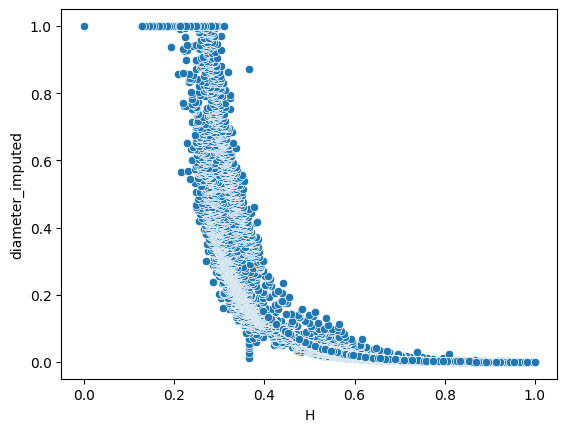

In [28]:
#Scatter plot example
sns.scatterplot(data=data,x='H',y='diameter_imputed')

###### Strong and negative relation between Absolute magnitude and diameter where cluster is formed between 0.2 to 0.4 range of H.

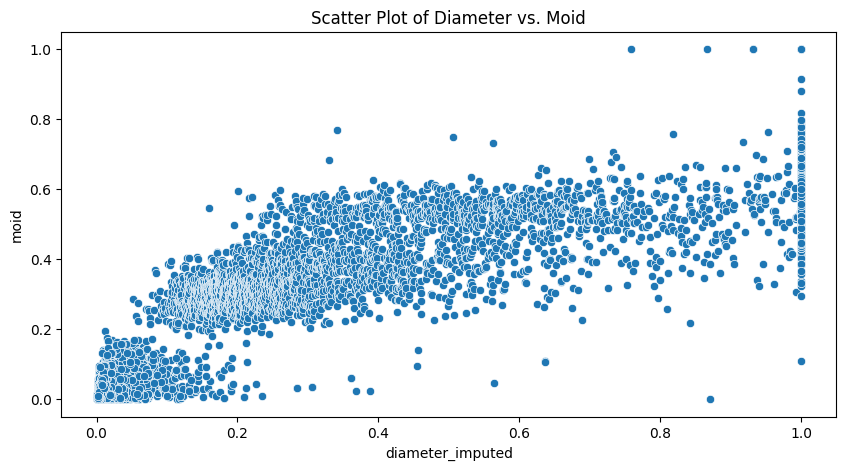

In [29]:
# Scatter plot for relationship between Diameter and Albedo
plt.figure(figsize=(10,5))
sns.scatterplot(data=data, x='diameter_imputed', y='moid')
plt.title("Scatter Plot of Diameter vs. Moid")
plt.show()

###### Strong and positive relation between moid and diameter is seen.

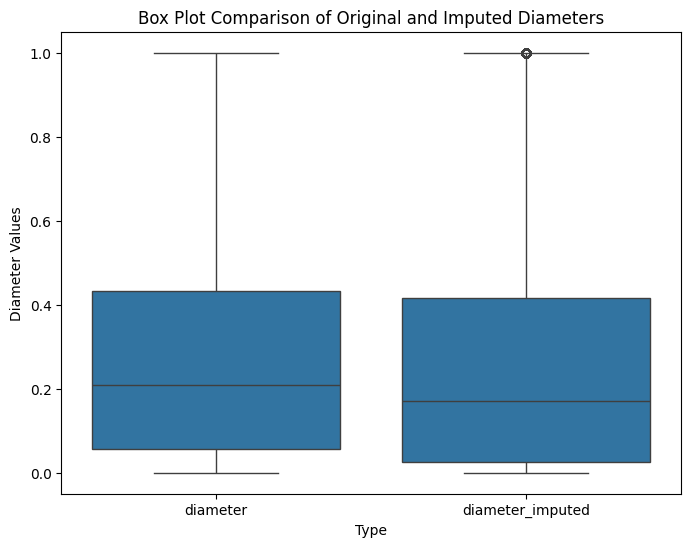

In [30]:
# Create a new DataFrame with both columns
diameter_df=data[['diameter','diameter_imputed']].copy()

# Melt the DataFrame to a long format for seaborn boxplot
melted_df=diameter_df.melt(var_name='Type',value_name='Diameter')

# Plot side-by-side box plots
plt.figure(figsize=(8,6))
sns.boxplot(x='Type',y='Diameter',data=melted_df)
plt.title('Box Plot Comparison of Original and Imputed Diameters')
plt.xlabel('Type')
plt.ylabel('Diameter Values')
plt.show()

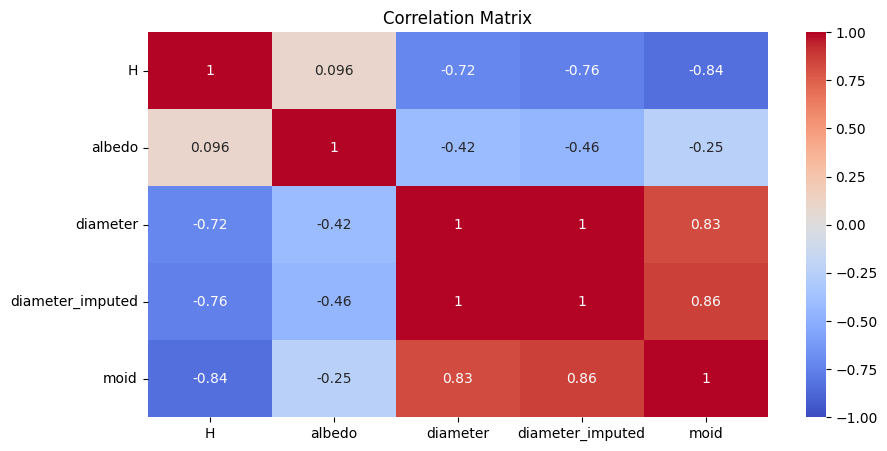

In [31]:
correlation_columns=['H','albedo','diameter','diameter_imputed','moid']
correlation_matrix=data[correlation_columns].corr()
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',vmin=-1,vmax=1)
plt.title('Correlation Matrix')
plt.show()

###### Relations of various key parameters with each other are checked.Dependencies are seen through the matrix.

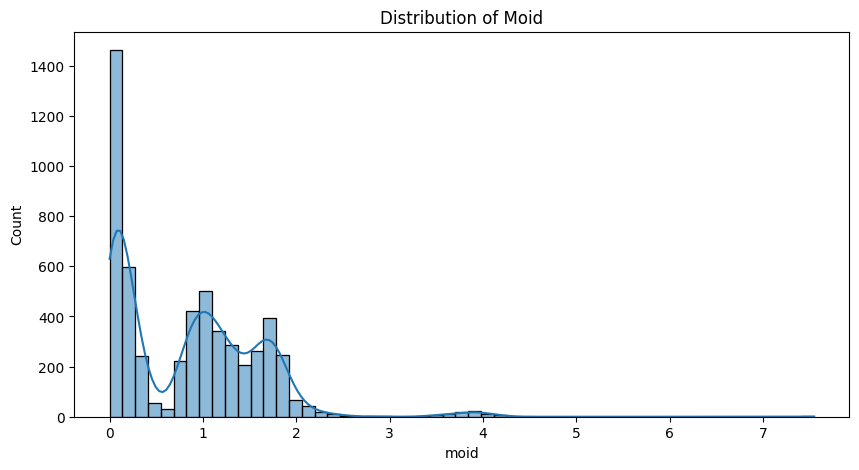

In [48]:
plt.figure(figsize=(10,5))
sns.histplot(df['moid'],kde=True)
plt.title("Distribution of Moid")
plt.show()

In [34]:
(df['moid']<=0.05).value_counts()

moid
False    4664
True      837
Name: count, dtype: int64

###### Moid < 0.05au indicates that asteroids are PHA.

In [35]:
(df['H']<=22).value_counts()

H
True     5186
False     315
Name: count, dtype: int64

In [36]:
(data['pha_Y']==1).sum()

np.int64(589)

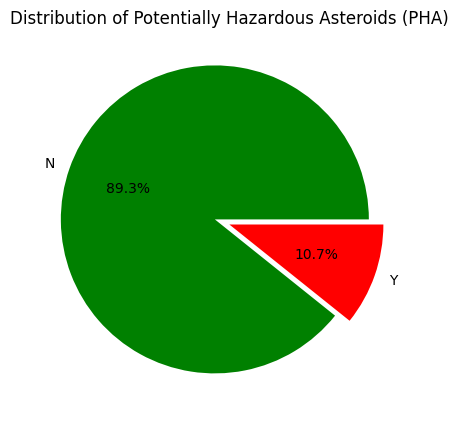

In [37]:
pha_counts=df['pha'].value_counts()

# Plot the pie chart
plt.figure(figsize=(10,5))
plt.pie(pha_counts,labels=pha_counts.index,explode=(0.1,0),autopct='%1.1f%%',colors=['green', 'red'])
plt.title('Distribution of Potentially Hazardous Asteroids (PHA)')
plt.show()

###### Considering all parameters, 10.7% of 5500 asteroids are classified to be PHA.

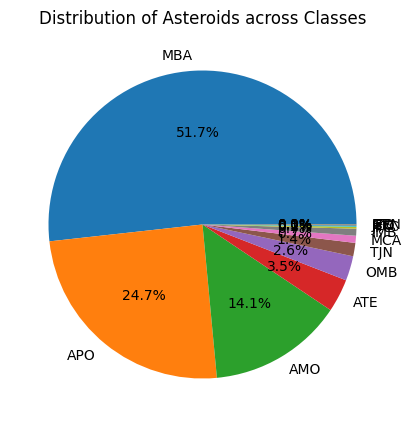

In [38]:
pha_counts=df['class'].value_counts()

# Plot the pie chart
plt.figure(figsize=(10,5))
plt.pie(pha_counts,labels=pha_counts.index,autopct='%1.1f%%')
plt.title('Distribution of Asteroids across Classes')
plt.show()

###### Majority of pha belong to MBA and APO classes

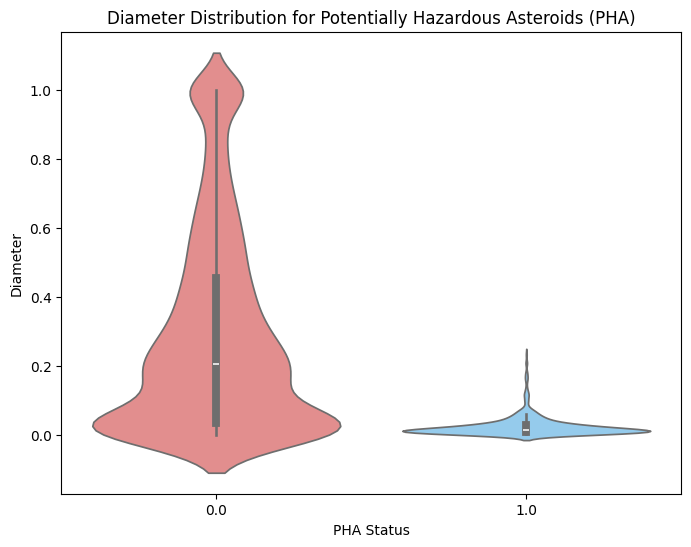

In [41]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='pha_Y', y='diameter_imputed', data=data, palette=['lightcoral', 'lightskyblue'])
plt.title('Diameter Distribution for Potentially Hazardous Asteroids (PHA)')
plt.xlabel('PHA Status')
plt.ylabel('Diameter')
plt.show()

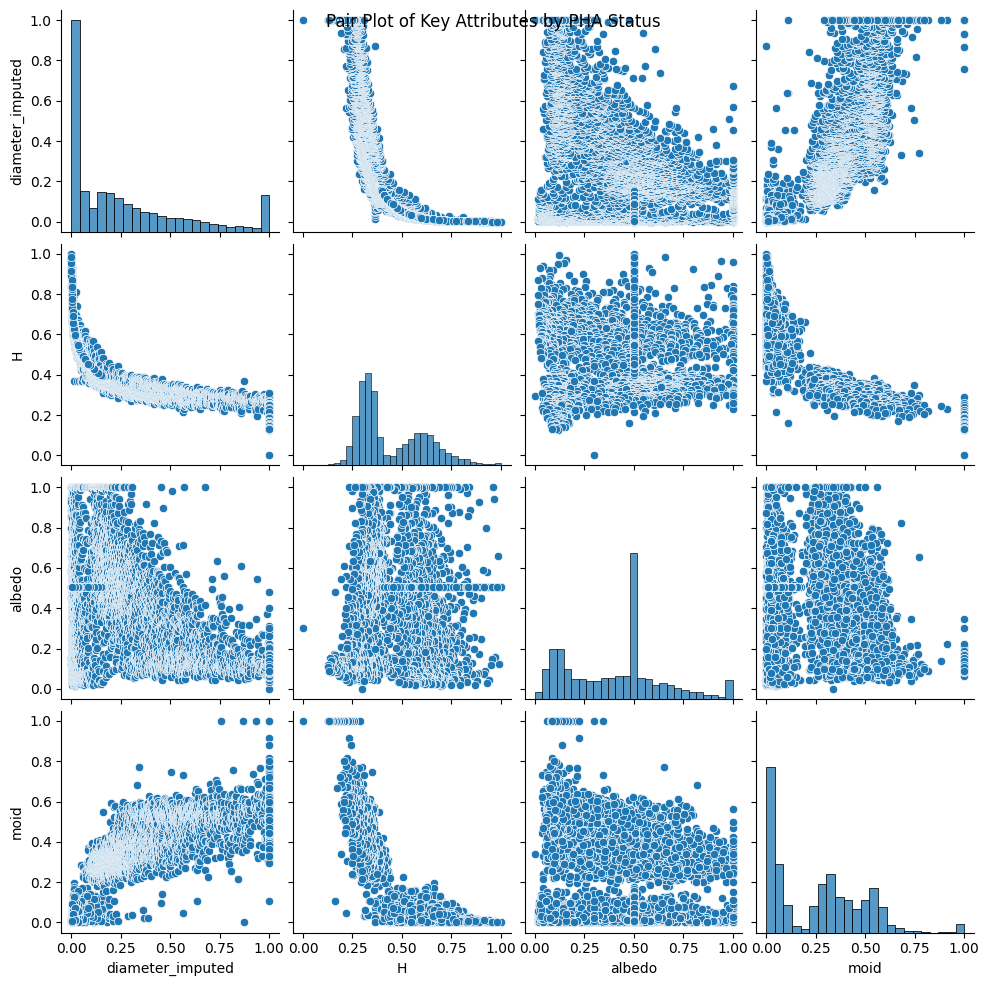

In [39]:
sns.pairplot(ogd[['diameter_imputed', 'H', 'albedo', 'moid']], palette=['blue', 'orange'])
plt.suptitle('Pair Plot of Key Attributes by PHA Status')
plt.show()

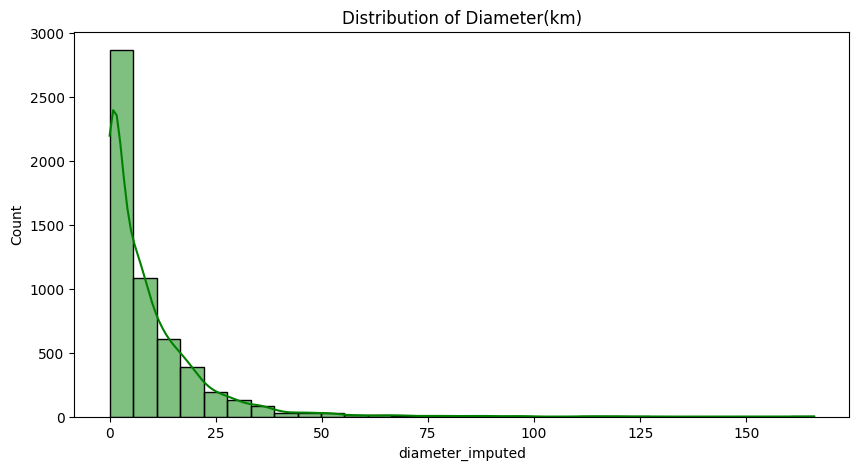

In [40]:
plt.figure(figsize=(10,5))
sns.histplot(df['diameter_imputed'],kde=True,bins=30,color='green',edgecolor='black')
plt.title("Distribution of Diameter(km)")
plt.show()

In [ ]:
data[data['e'] > 0.5].shape[0]

1270

###### These many asteroids have elongated orbits which tend to have close approach to earth.

In [45]:
data[data['i']<0.1].shape[0]

4216

###### Lower inclination leads to high chances of intersection.